<a href="https://colab.research.google.com/github/yash-datascience/Play-Store-App-Review-Analysis-/blob/main/CH_Yash_Patil_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading up the data

data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone Project EDA/Data/Play Store Data.csv")

In [4]:
# checking the shape of the data
np.shape(data)

(10841, 13)

In [5]:
# printing first five rows of data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#checking for duplicate rows across dataframe
duplicate = data[data.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [7]:
#droping duplicates from original dataframe

data.drop_duplicates(inplace=True)

In [8]:
# displaying info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# droping the last three columns of the dataframe

data = data.drop(['Last Updated','Current Ver','Android Ver'],axis=1)

In [11]:
#checking for null values in data

data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

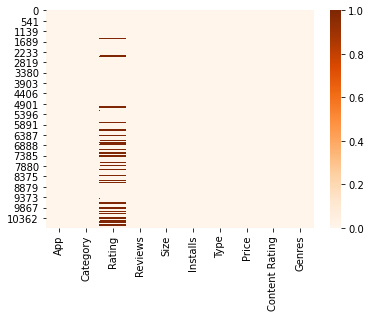

In [16]:
#visualizing missing data values
sns.heatmap(data.isnull(),cmap="Oranges")

##Handling the Missing Values

In [17]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,10358,10358,8893.000000,10358,10358,10358,10357,10358,10357,10358
unique,9660,34,NaN,6002,462,22,3,93,6,120
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools
freq,9,1943,NaN,593,1526,1488,9591,9592,8382,842
mean,NaN,NaN,4.189542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.545452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# mean of rating column is 4.1
# top value of Type is free
# top value of content rating is Everyone

#Lets interpolate these values in our data

#but first remove the gap between the content and rating in content rating cloumn

#Replacing spaces from all columns names
data.columns = data.columns.str.replace(' ','')

#Filling missing Values
data.Rating.fillna(4.1,inplace=True)
data.Type.fillna('Free',inplace=True)
data.ContentRating.fillna('Everyone',inplace=True)

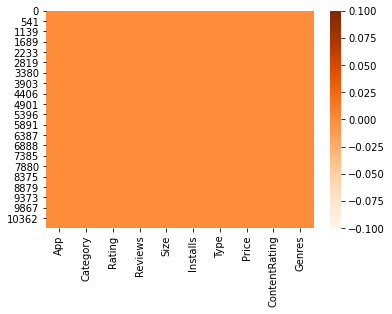

In [21]:
#checking for null again
sns.heatmap(data.isnull(),cmap="Oranges")

In [22]:
# Rating has the heighest value of 5 let see if we have some more than that
data[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018"


In [23]:
data.drop([10472],inplace=True)

##Analysis of Single Column

In [24]:
# removing unwanted symbols from Price, Installs and Size

data['Price'] = data['Price'].str.replace('$','')
data['Installs'] = data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].str.replace(',','')
data['Size'] = data['Size'].str.replace('M','')
data['Size'] = data['Size'].str.replace('k','')
data['Size'] = data['Size'].str.replace('+','')

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity


In [25]:
# Converting reviews installs to int and price to float

data['Reviews'] = data['Reviews'].astype(int)
data['Installs'] = data['Installs'].astype(int)
data['Price'] = data['Price'].astype(float)

##Category

In [26]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [27]:
data.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

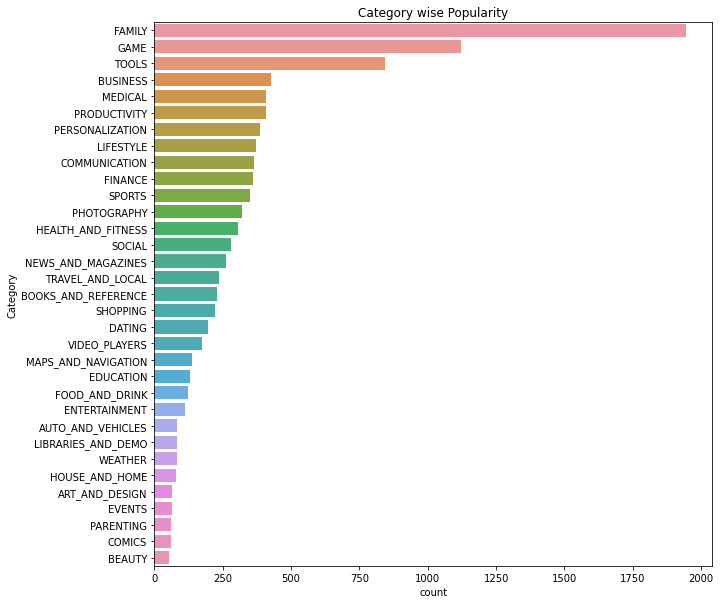

In [33]:
#Ploting the Category Popularity wise

plt.figure(figsize = (10, 10))
sns.countplot(y='Category',data=data,order=data.Category.value_counts().index)
plt.title('Category wise Popularity')
plt.show()

##Rating

In [34]:
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [40]:
above_4_rating = data[data['Rating']>4]

In [41]:
above_4_rating.Rating.value_counts()

4.1    2122
4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.7     484
5.0     271
4.8     228
4.9      87
Name: Rating, dtype: int64

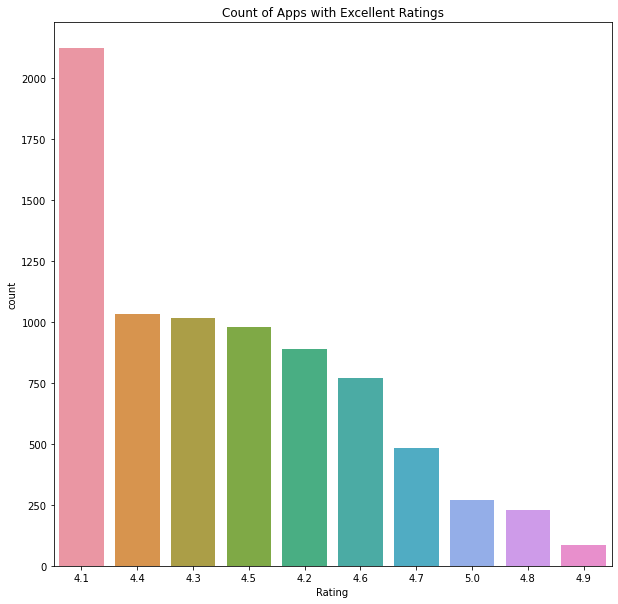

In [42]:
#visualizing count of apps with excelent rating
plt.figure(figsize = (10, 10))
sns.countplot(x='Rating',data=data,order=above_4_rating.Rating.value_counts().index)
plt.title('Count of Apps with Excellent Ratings')
plt.show()

In [44]:
average_rating = data[(data['Rating']>3) & (data['Rating']<4)]

In [46]:
average_rating.Rating.value_counts()

3.9    372
3.8    293
3.7    231
3.6    169
3.5    157
3.4    127
3.3    101
3.1     69
3.2     64
Name: Rating, dtype: int64

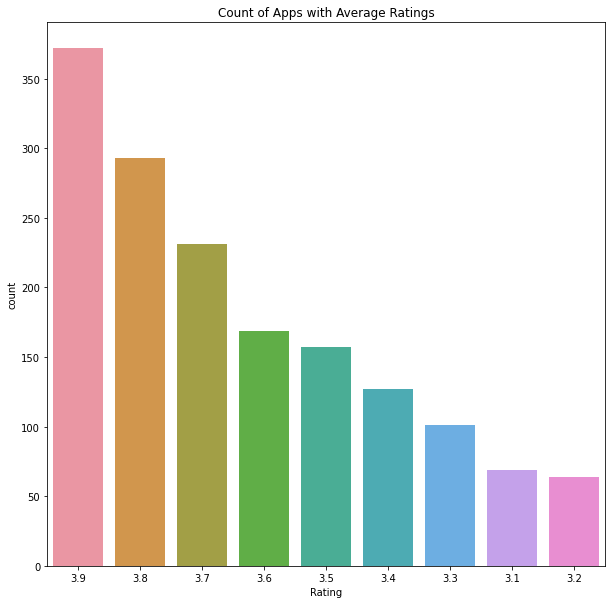

In [47]:
#visualizing count of apps with average rating
plt.figure(figsize = (10, 10))
sns.countplot(x='Rating',data=data,order=average_rating.Rating.value_counts().index)
plt.title('Count of Apps with Average Ratings')
plt.show()

In [48]:
below_average_rating = data[data['Rating']<3]
below_average_rating.Rating.value_counts()

2.9    45
2.8    40
2.6    24
2.7    23
2.5    20
2.3    20
2.4    19
1.0    16
2.2    14
2.0    12
1.9    12
2.1     8
1.8     8
1.7     8
1.6     4
1.4     3
1.5     3
1.2     1
Name: Rating, dtype: int64

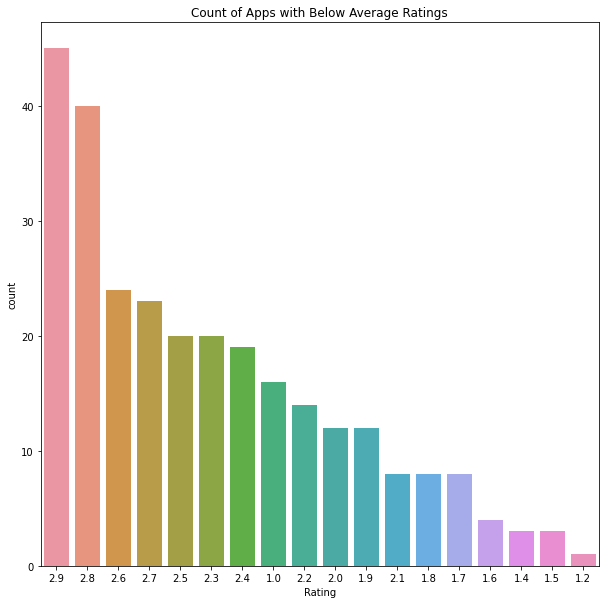

In [51]:
#visualizing count of apps with average rating
plt.figure(figsize = (10, 10))
sns.countplot(x='Rating',data=data,order=below_average_rating.Rating.value_counts().index)
plt.title('Count of Apps with Below Average Ratings')
plt.show()

In [50]:
data.Rating.value_counts()

4.1    2122
4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

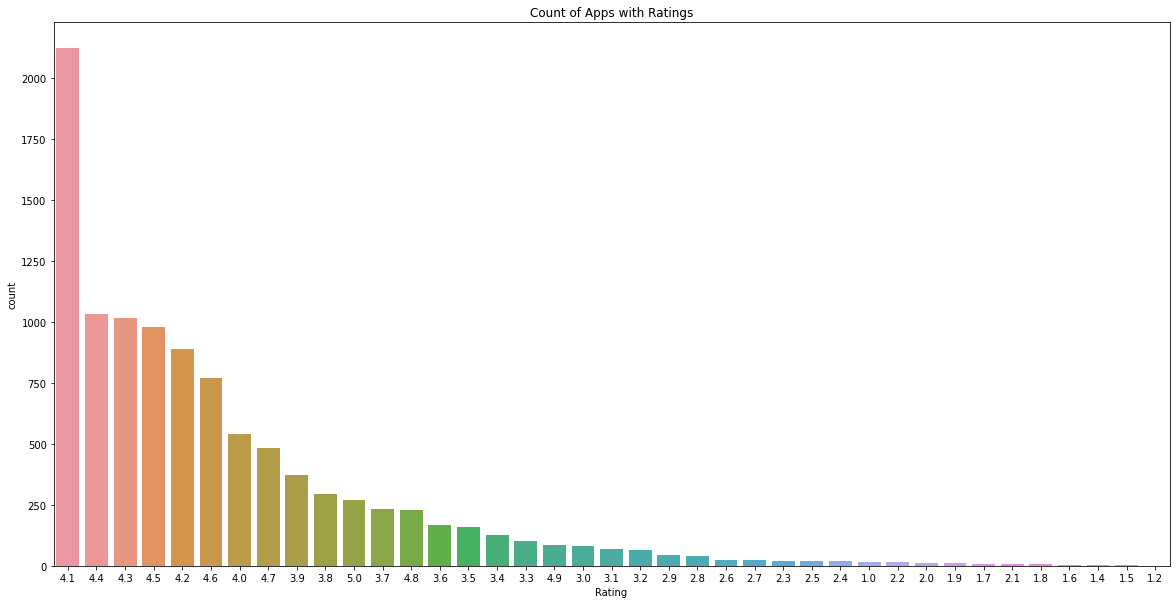

In [54]:
#visualizing count of apps with average rating
plt.figure(figsize = (20, 10))
sns.countplot(x='Rating',data=data,order=data.Rating.value_counts().index)
plt.title('Count of Apps with Ratings')
plt.show()

In [55]:
data.Size.value_counts().head(10)

Varies with device    1526
11                     189
13                     186
12                     186
14                     183
15                     174
17                     157
26                     147
16                     143
19                     135
Name: Size, dtype: int64

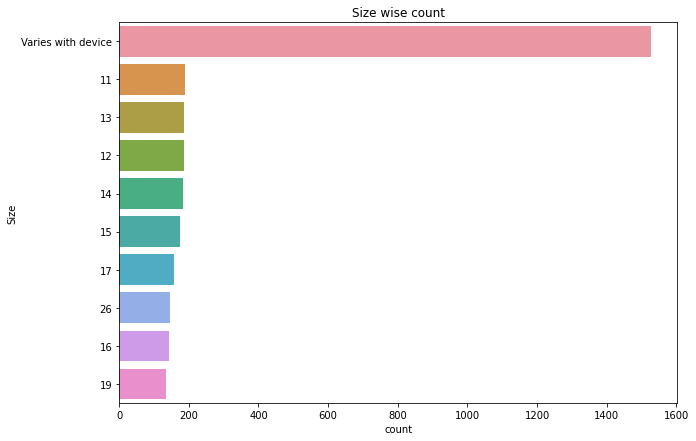

In [67]:
#visualizing Size wise count 
plt.figure(figsize = (10,7))
sns.countplot(y='Size',data=data,order=data.Size.value_counts().head(10).index)
plt.title('Size wise count')
plt.show()

##Installs

In [61]:
data.Installs.value_counts().head(10)

1000000     1488
10000000    1132
100000      1129
10000       1033
1000         890
100          710
5000000      683
500000       517
50000        474
5000         469
Name: Installs, dtype: int64

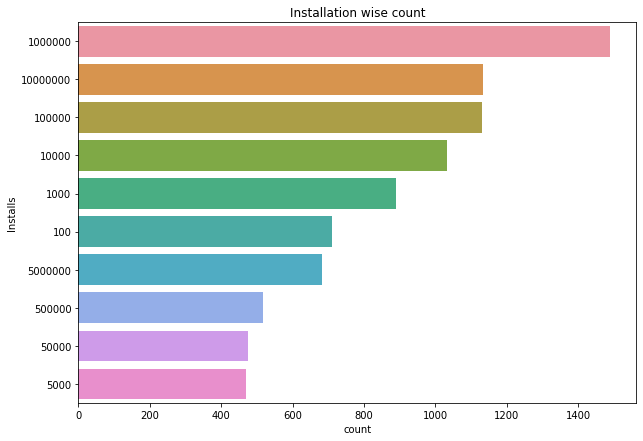

In [68]:
#visualizing Installation wise count 
plt.figure(figsize = (10,7))
sns.countplot(y='Installs',data=data,order=data.Installs.value_counts().head(10).index)
plt.title('Installation wise count')
plt.show()

##Type

In [69]:
data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [70]:
data.Type.value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

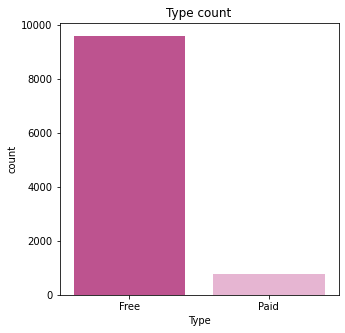

In [72]:
#visualizing Size wise count 
plt.figure(figsize = (5,5))
sns.countplot(x='Type',data=data,order=data.Type.value_counts().index)
plt.title('Type count')
plt.show()

In [73]:
data.Price.value_counts().head(10)

0.00    9592
0.99     146
2.99     125
1.99      73
4.99      70
3.99      60
1.49      46
5.99      27
2.49      25
9.99      19
Name: Price, dtype: int64

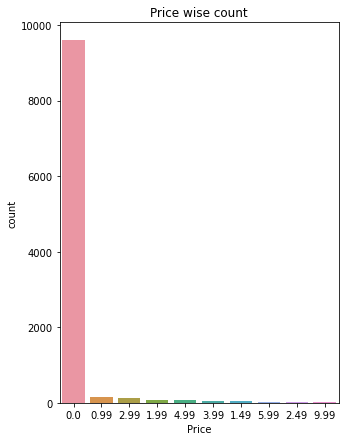

In [75]:
#visualizing Size wise count 
plt.figure(figsize = (5,7))
sns.countplot(x='Price',data=data,order=data.Price.value_counts().head(10).index)
plt.title('Price wise count')
plt.show()

We can see from above most of the apps are free so lets plot paid apps price plot

In [77]:
paid = data[data['Type']=='Paid']
paid.Price.value_counts().head(10)

0.99      146
2.99      125
1.99       73
4.99       70
3.99       60
1.49       46
5.99       27
2.49       25
9.99       19
399.99     12
Name: Price, dtype: int64

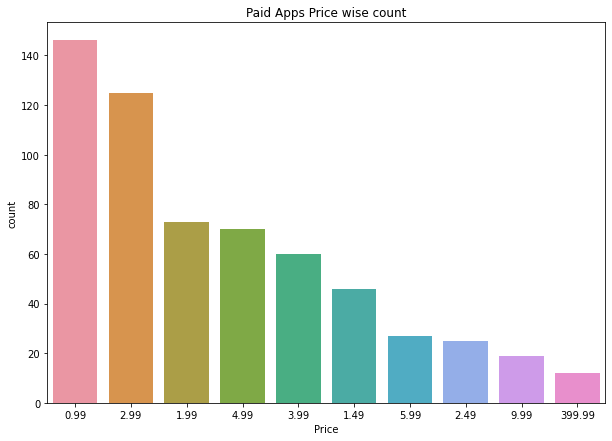

In [78]:
#visualizing Size wise count 
plt.figure(figsize = (10,7))
sns.countplot(x='Price',data=data,order=paid.Price.value_counts().head(10).index)
plt.title('Paid Apps Price wise count')
plt.show()

##Content Rating

In [79]:
data.ContentRating.value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: ContentRating, dtype: int64

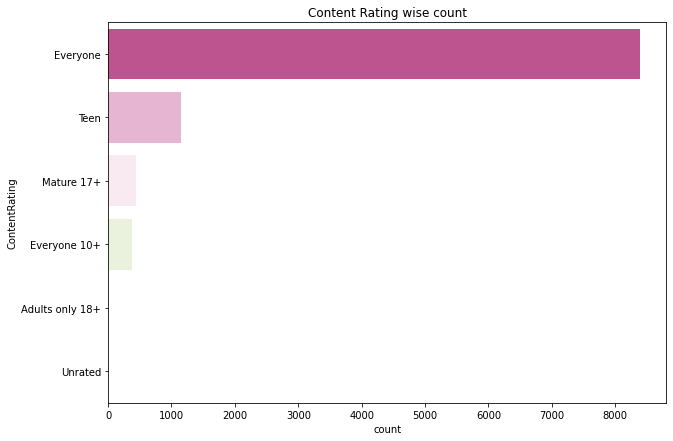

In [81]:
#visualizing Size wise count 
plt.figure(figsize = (10,7))
sns.countplot(y='ContentRating',data=data,order=data.ContentRating.value_counts().index)
plt.title('Content Rating wise count')
plt.show()

##Correlation Matrix

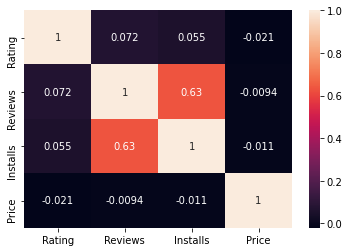

In [82]:
cm = data.corr()
sns.heatmap(cm,annot=True)

##Category Vs Rating

In [90]:
#Groping Data with category
new_grp = data.groupby('Category')['Rating'].mean()

Text(0.5, 1.0, 'Category vs Rating')

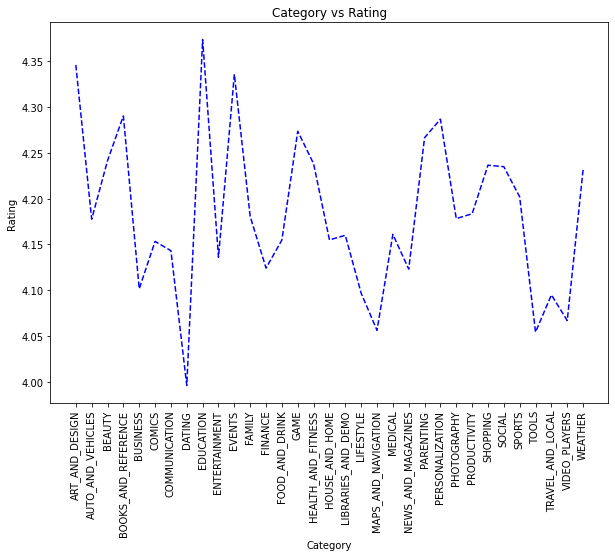

In [94]:
plt.figure(figsize=(10,7))
plt.plot(new_grp,'r--',color='b')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Category vs Rating')

##Category vs Price

In [96]:
price_grp = data.groupby('Category')['Price'].sum()

Text(0.5, 1.0, 'Category vs Price')

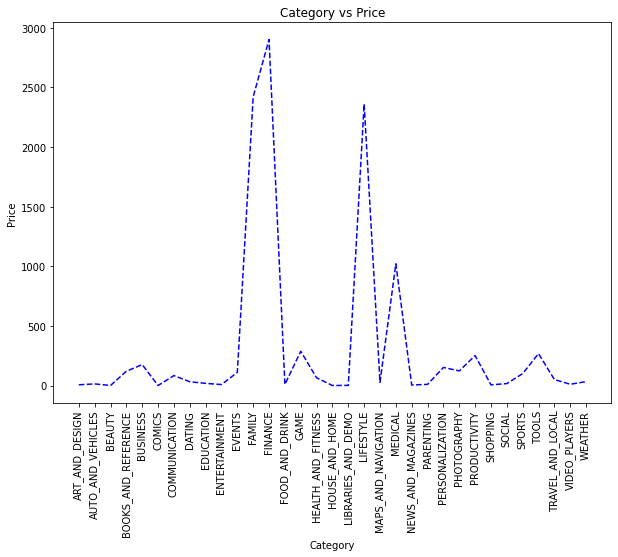

In [97]:
plt.figure(figsize=(10,7))
plt.plot(price_grp,'r--',color='b')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Category vs Price')

##Category vs Reviews

In [100]:
reviews_grp = data.groupby('Category')['Reviews'].sum()

Text(0.5, 1.0, 'Category vs Reviews')

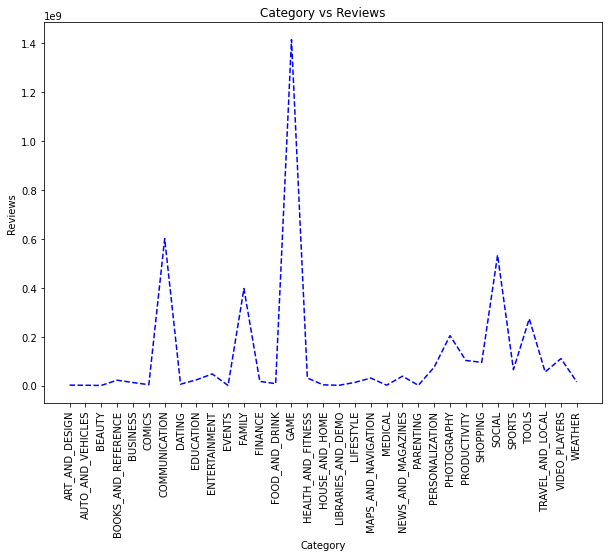

In [101]:
plt.figure(figsize=(10,7))
plt.plot(reviews_grp,'r--',color='b')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.title('Category vs Reviews')

##Category vs Installs

In [105]:
installs_grp = data.groupby('Category')['Installs'].sum()

Text(0.5, 1.0, 'Category vs Installs')

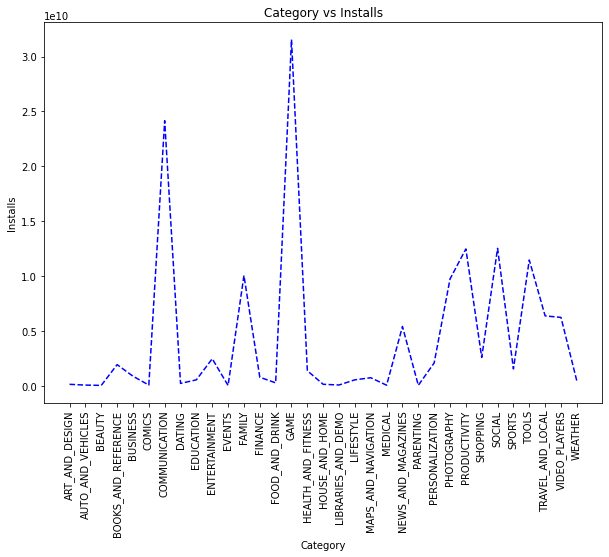

In [106]:
plt.figure(figsize=(10,7))
plt.plot(installs_grp,'r--',color='b')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Category vs Installs')